# Assignment XIII: Attention

## Question 1

Please create a transformer-based classifier for English name gender classification. 

Please present your training history (i.e., accuracies and losses of all epochs) and the model evaluation metrics on the testing dataset.

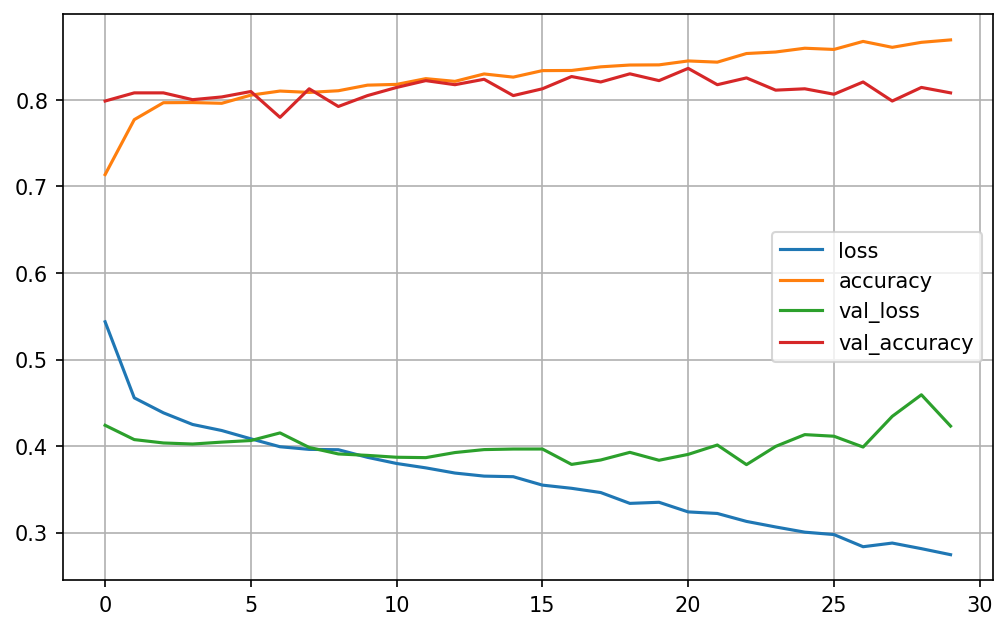

In [55]:
plot2(history)

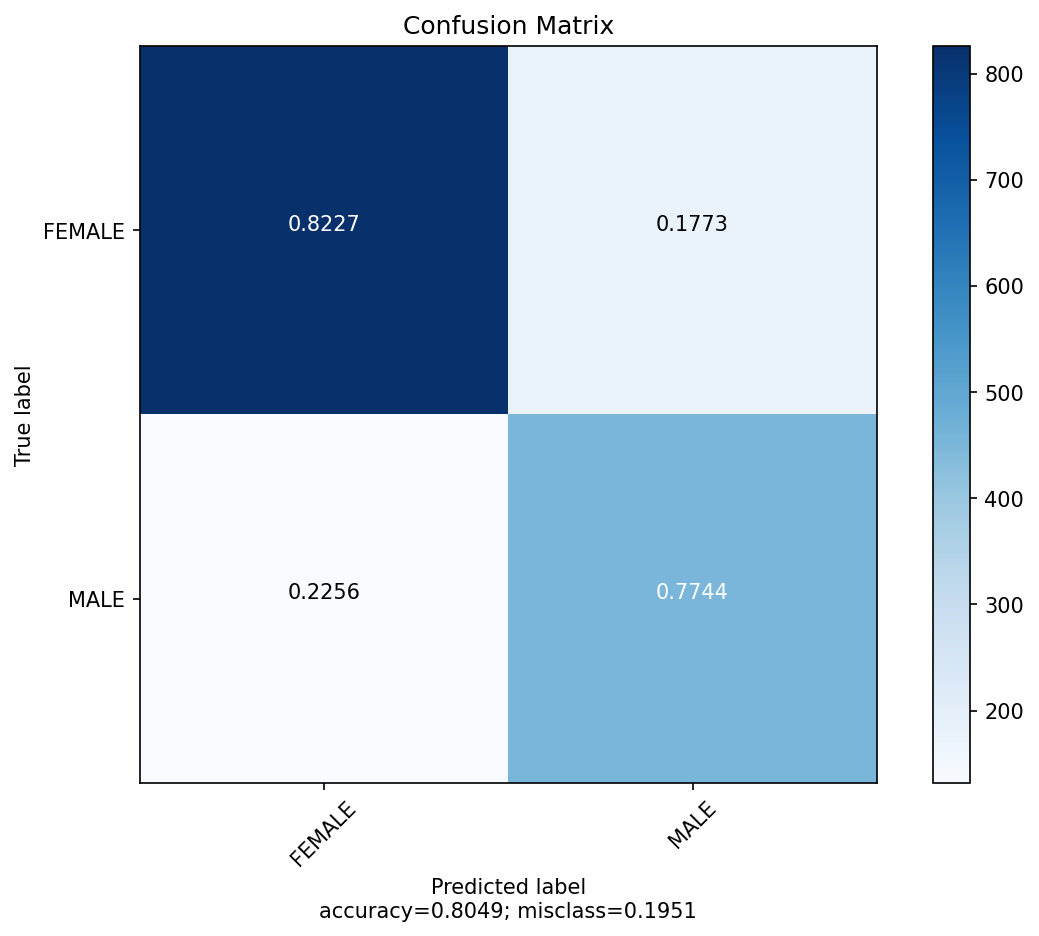

In [56]:
plot_confusion_matrix(cm,
                      normalize=True,
                      target_names=['FEMALE', 'MALE'],
                      title="Confusion Matrix")

## Question 2

In the Lecture, Sequence Model with Attention, we implemented an Attention-based sequence-to-sequence model on the dataset of number addition. We used the one-hot encoding of the characters as the token representation.

Please include embedding layers for both input sequences and output sequences and re-design the architecture of the attention-based encoder-decoder network accordingly to improve the sequence model. (Please create independent embedding layers for input and output sequences.)

A model summary is provided below.

Please present your (a) training history, (b) a subset of translated results from the testing data, and (c) one example of the attention plot.

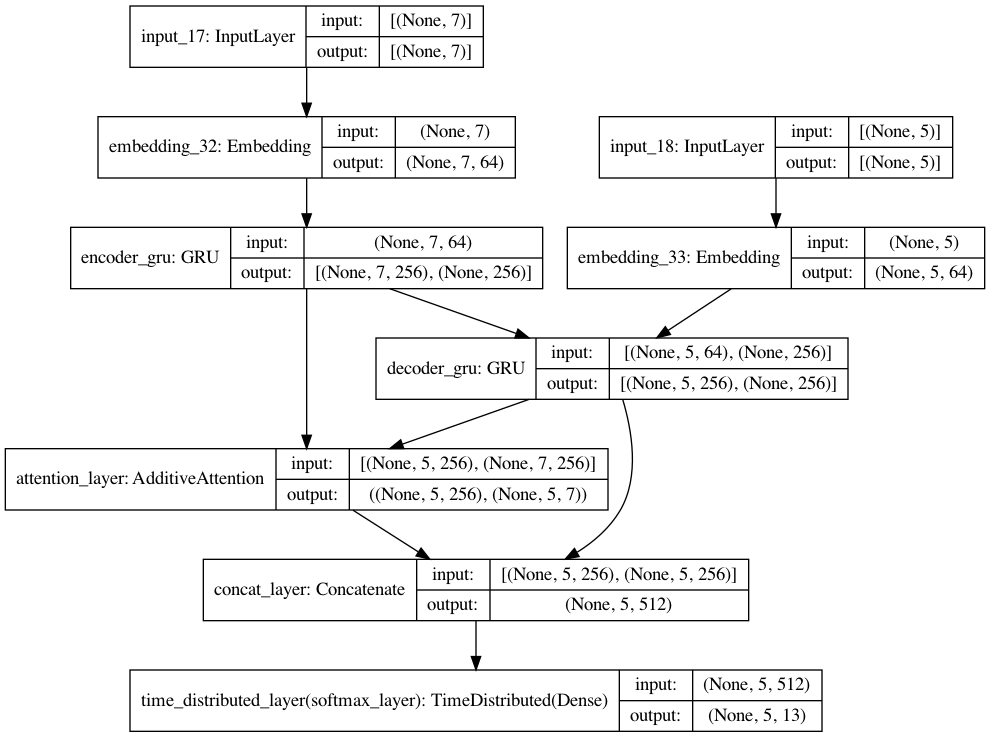

In [59]:
plot_model(full_model5, show_shapes=True)

In [65]:
for seq_index in range(20):
    # Take one sequence (part of the training set)
    # for trying out decoding.

    decoded_sentence, _ = decode_sequence(
        encoder_input_sequences[seq_index:seq_index + 1,:])
    print('-')
    print('Input sentence:', tr_input_texts[seq_index])
    print('Decoded sentence:', decoded_sentence)

-
Input sentence: 27+673 
Decoded sentence: 700_
-
Input sentence: 153+27 
Decoded sentence: 180_
-
Input sentence: 93+901 
Decoded sentence: 994_
-
Input sentence: 243+678
Decoded sentence: 921_
-
Input sentence: 269+46 
Decoded sentence: 315_
-
Input sentence: 235+891
Decoded sentence: 1126_
-
Input sentence: 46+290 
Decoded sentence: 336_
-
Input sentence: 324+947
Decoded sentence: 1271_
-
Input sentence: 721+49 
Decoded sentence: 770_
-
Input sentence: 535+7  
Decoded sentence: 542_
-
Input sentence: 45+117 
Decoded sentence: 162_
-
Input sentence: 669+174
Decoded sentence: 843_
-
Input sentence: 904+7  
Decoded sentence: 911_
-
Input sentence: 22+731 
Decoded sentence: 753_
-
Input sentence: 83+742 
Decoded sentence: 825_
-
Input sentence: 808+769
Decoded sentence: 1577_
-
Input sentence: 240+42 
Decoded sentence: 282_
-
Input sentence: 18+44  
Decoded sentence: 62_
-
Input sentence: 4+166  
Decoded sentence: 170_
-
Input sentence: 731+13 
Decoded sentence: 744_


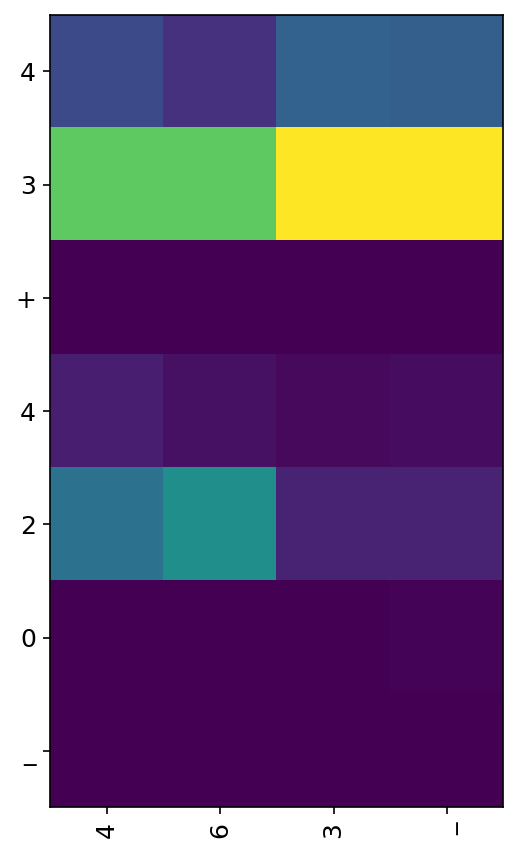

In [68]:
ind = 123
doc_inputs, attention_weights = decode_sequence(encoder_input_sequences[ind:ind+1,:])
mats = []
dec_inputs = []
for dec_ind, attn in attention_weights:
    mats.append(attn.reshape(-1))
    dec_inputs.append(dec_ind)
attention_mat = np.transpose(np.array(mats))
fig, ax = plt.subplots(figsize=(5, 7))
ax.imshow(attention_mat)

ax.set_xticks(np.arange(attention_mat.shape[1]))
ax.set_yticks(np.arange(attention_mat.shape[0]))

ax.set_xticklabels(
    [dec_index2word[inp] if inp != 2 else "_" for inp in dec_inputs])
ax.set_yticklabels([
    enc_index2word[inp] if inp != 2 else "_"
    for inp in encoder_input_sequences[ind]
])

ax.tick_params(labelsize=12)
ax.tick_params(axis='x', labelrotation=90)